In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
df = pd.read_csv(open("F:\Sem 3\EE-258\Homework\Credit.csv"), header=0,index_col=0)

credit = df.dropna(axis= 0)
#print (credit)
credit.head(5)

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [2]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 1 to 400
Data columns (total 11 columns):
Income       400 non-null float64
Limit        400 non-null int64
Rating       400 non-null int64
Cards        400 non-null int64
Age          400 non-null int64
Education    400 non-null int64
Gender       400 non-null object
Student      400 non-null object
Married      400 non-null object
Ethnicity    400 non-null object
Balance      400 non-null int64
dtypes: float64(1), int64(6), object(4)
memory usage: 37.5+ KB


   The data is 11 X 400 long matrix. It has no non-null data. But it has non-numeric that is object so we have to convert it.

In [3]:
credit.describe()

,Income,Limit,Rating,Cards,Age,Education,Balance
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,45.218885,4735.600000,354.940000,2.957500,55.667500,13.450000,520.015000
std,35.244273,2308.198848,154.724143,1.371275,17.249807,3.125207,459.758877
min,10.354000,855.000000,93.000000,1.000000,23.000000,5.000000,0.000000
25%,21.007250,3088.000000,247.250000,2.000000,41.750000,11.000000,68.750000
50%,33.115500,4622.500000,344.000000,3.000000,56.000000,14.000000,459.500000
75%,57.470750,5872.750000,437.250000,4.000000,70.000000,16.000000,863.000000
max,186.634000,13913.000000,982.000000,9.000000,98.000000,20.000000,1999.000000


In [4]:
credit['Student'].replace({'No': 0, 'Yes':1} ,inplace=True)
credit['Student'].unique()

array([0, 1], dtype=int64)

        Make test and train data for income, limit, rating, student

In [5]:
X = credit.drop(['Cards','Age','Education','Gender','Married','Ethnicity','Balance'],axis = 1)
y = credit.Balance
X = X.values
y = y.values
from sklearn.cross_validation import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2)
X_train.shape

C:\Users\dhar_\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


(320, 4)

In [6]:
######     Ridge Regression  for income, limit, rating, student to predict balance ###### 

## alpha = 0.5

from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha= 0.5, solver="cholesky",normalize=True)
ridge_reg.fit(X_train, Y_train)
y_pred = ridge_reg.predict(X_test)
#A.append(y_pred)

mse = np.mean((y_pred - Y_test)**2)
#print("Ridge Score 1",ridge_reg.score(X_test,Y_test))

#print("Ridge MSE 1",mse)
#print("Predicted output 1",y_pred)

## alpha = 1

ridge_reg2 = Ridge(alpha= 1, solver="cholesky",normalize=True)
ridge_reg2.fit(X_train, Y_train)
y_pred2 = ridge_reg2.predict(X_test)
#print()

mse2 = np.mean((y_pred2 - Y_test)**2)
#print("Ridge Score 2", ridge_reg2.score(X_test,Y_test))

#print("Ridge MSE 2",mse2)
#print("Predicted output 1",y_pred2)

## alpha = 0.75

ridge_reg3 = Ridge(alpha= 0.75, solver="cholesky",normalize=True)
ridge_reg3.fit(X_train, Y_train)
y_pred3 = ridge_reg3.predict(X_test)
#print()

mse3 = np.mean((y_pred3 - Y_test)**2)
#print("Ridge Score 3", ridge_reg3.score(X_test,Y_test))

#print("Ridge MSE 3",mse3)
#print("Predicted output 1",y_pred3)


[[0.0], [0.1], [0.2], [0.30000000000000004], [0.4], [0.5], [0.6], [0.7], [0.7999999999999999], [0.8999999999999999], [0.9999999999999999], [1.0999999999999999], [1.2], [1.3], [1.4000000000000001], [1.5000000000000002], [1.6000000000000003], [1.7000000000000004], [1.8000000000000005], [1.9000000000000006]]


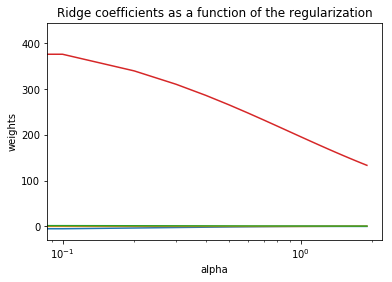

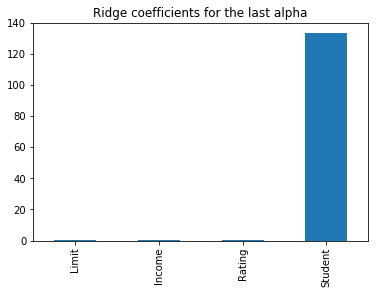

In [7]:
import matplotlib.pyplot as plt
from sklearn import linear_model
import numpy as np

from sklearn.linear_model import Ridge
b = []
a = [[]]
i = 0.0

while i< 2.0:
    ridgelo_reg = Ridge(alpha= i, solver="cholesky",normalize=True)
    ridgelo_reg.fit(X_train, Y_train)
    ylo_pred = ridgelo_reg.predict(X_test)
    a.append([i])
    i += 0.1
    from pandas import DataFrame, Series
    X2 = credit[['Income','Limit','Rating','Student']]
    coeff = DataFrame(X2.columns)
    coeff['Credit'] = Series(ridgelo_reg.coef_)
    predictors = X2.columns
    coef = Series(ridgelo_reg.coef_,predictors).sort_values()
    b.append(coef)

    #print(coeff)

a.pop(0)
ax = plt.gca()
print (a)

ax.plot(a, b)
ax.set_xscale('log')
#ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()  



coef.plot(kind="bar", x="a", y="b")
plt.title('Ridge coefficients for the last alpha')
plt.show()



(9.9999999999999994e-12,
 100000000000.0,
 -29.601339867088434,
 444.81381821790961)

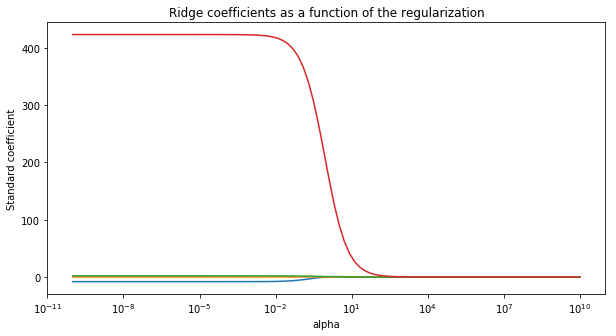

In [8]:
classif = ridgelo_reg
coeff = []
alphas = np.logspace(-10,10, 100)

for a in alphas:
    classif.set_params(alpha=a)
    classif.fit(X_train, Y_train)
    coeff.append(classif.coef_)

plt.figure(figsize=(10, 5))
input_a=np.vstack(coeff)
g = plt.gca()
g.plot(alphas, input_a)
g.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('Standard coefficient')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')


Ans. As the MSE increases the Accuracy score decreases. It all depends on the value of alpha which we vary.

In [9]:
from pandas import DataFrame, Series
X2 = credit[['Income','Limit','Rating','Student']]
coeff = DataFrame(X2.columns)
coeff['Credit'] = Series(ridge_reg.coef_)
print(coeff)

predictors = X2.columns
coef = Series(ridge_reg.coef_,predictors).sort_values()
#coef.plot(kind='bar', title='Modal Coefficients , alpha = 0.5')
print(coef)

         0      Credit
0   Income   -1.146740
1    Limit    0.074903
2   Rating    1.117576
3  Student  265.371709
Income      -1.146740
Limit        0.074903
Rating       1.117576
Student    265.371709
dtype: float64


         0      Credit
0   Income    0.048132
1    Limit    0.057567
2   Rating    0.858545
3  Student  195.822788


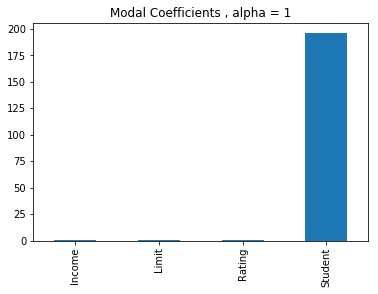

In [10]:
from pandas import DataFrame, Series
X2 = credit[['Income','Limit','Rating','Student']]
coeff2 = DataFrame(X2.columns)
coeff2['Credit'] = Series(ridge_reg2.coef_)
print(coeff2)

coeff2 = Series(ridge_reg2.coef_,predictors).sort_values()
coeff2.plot(kind='bar', title='Modal Coefficients , alpha = 1')

         0      Credit
0   Income   -0.369403
1    Limit    0.064656
2   Rating    0.964431
3  Student  225.250686


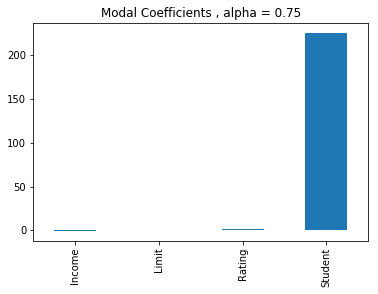

In [11]:
from pandas import DataFrame, Series
X2 = credit[['Income','Limit','Rating','Student']]
coeff3 = DataFrame(X2.columns)
coeff3['Credit'] = Series(ridge_reg3.coef_)
print(coeff3)
%matplotlib inline
coef3 = Series(ridge_reg3.coef_,predictors).sort_values()
coef3.plot(kind='bar', title='Modal Coefficients , alpha = 0.75')

  We can see that the prediction is dependent on mostly student column and others have less impact on the prediction of balance.

        Lasso Regression

C:\Users\dhar_\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:9: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  if __name__ == '__main__':
C:\Users\dhar_\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\linear_model\coordinate_descent.py:477: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\Users\dhar_\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[[0.0], [0.1], [0.2], [0.30000000000000004], [0.4], [0.5], [0.6], [0.7], [0.7999999999999999], [0.8999999999999999], [0.9999999999999999], [1.0999999999999999], [1.2], [1.3], [1.4000000000000001], [1.5000000000000002], [1.6000000000000003], [1.7000000000000004], [1.8000000000000005], [1.9000000000000006]]


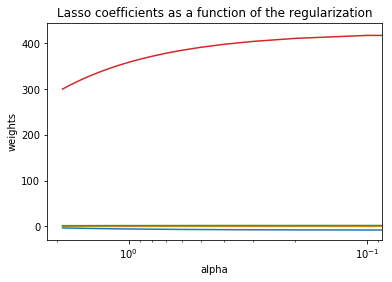

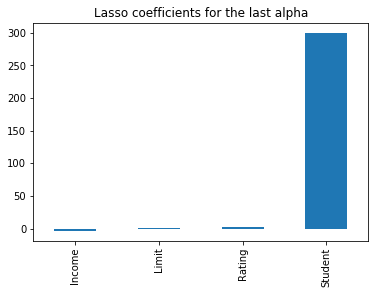

In [12]:
from sklearn.linear_model import Lasso

b = []
a = [[]]
i = 0.0

while i< 2.0:
    lassoReglo = Lasso(alpha=i, normalize=True)
    lassoReglo.fit(X_train,Y_train)
    y_lasso_predlo = lassoReglo.predict(X_test)
    a.append([i])
    i += 0.1
    from pandas import DataFrame, Series
    X2 = credit[['Income','Limit','Rating','Student']]
    coeff = DataFrame(X2.columns)
    coeff['Credit'] = Series(lassoReglo.coef_)
    predictors = X2.columns
    coef = Series(lassoReglo.coef_,predictors).sort_values()
    b.append(coef)

    #print(coeff)

a.pop(0)
ax = plt.gca()
print (a)

ax.plot(a, b)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Lasso coefficients as a function of the regularization')
plt.axis('tight')
plt.show()  

coef.plot(kind="bar", x="a", y="b")
plt.title('Lasso coefficients for the last alpha')
plt.show()

C:\Users\dhar_\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\dhar_\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\dhar_\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\dhar_\AppData\Local\conda\conda\envs\tensorflow\lib\site-p

(9.9999999999999994e-12,
 100000000000.0,
 -29.601767564299831,
 444.82030325141443)

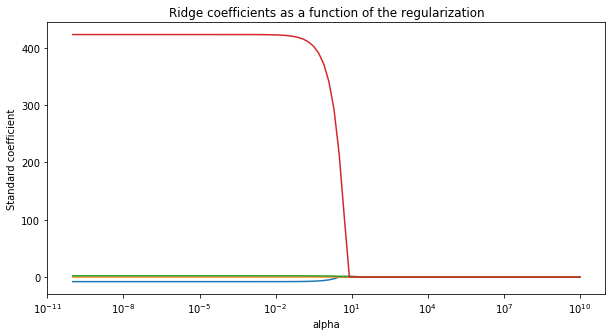

In [43]:
classif = lassoReglo
coeff = []
alphas = np.logspace(-10,10, 100)

for a in alphas:
    classif.set_params(alpha=a)
    classif.fit(X_train, Y_train)
    coeff.append(classif.coef_)

plt.figure(figsize=(10, 5))
input_a=np.vstack(coeff)
g = plt.gca()
g.plot(alphas, input_a)
g.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('Standard coefficient')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')


In [13]:
###     Lasso Regression for income, limit, rating, student to predict balance  ####


#alpha = 0.3
lassoReg = Lasso(alpha=0.3, normalize=True)
lassoReg.fit(X_train,Y_train)
y_lasso_pred = lassoReg.predict(X_test)

# calculating mse
lasso_mse = np.mean((y_lasso_pred - Y_test)**2)
print("Lasso MSE 1 =", lasso_mse)
print("Lasso Score 1 =", lassoReg.score(X_test,Y_test))
print()


#alpha = 0.5
lassoReg2 = Lasso(alpha=0.5, normalize=True)
lassoReg2.fit(X_train,Y_train)
y_lasso_pred2 = lassoReg2.predict(X_test)

# calculating mse
lasso_mse2 = np.mean((y_lasso_pred2 - Y_test)**2)
print("Lasso MSE 2 =", lasso_mse2)
print("Lasso Score 2 =", lassoReg2.score(X_test,Y_test))
print()

#alpha = 0.7
lassoReg3 = Lasso(alpha=0.7, normalize=True)
lassoReg3.fit(X_train,Y_train)
y_lasso_pred3 = lassoReg3.predict(X_test)

# calculating mse
lasso_mse3 = np.mean((y_lasso_pred3 - Y_test)**2)
print("Lasso MSE 3 =", lasso_mse3)
print("Lasso Score 3 =",lassoReg3.score(X_test,Y_test))
print()


Lasso MSE 1 = 9858.37331248
Lasso Score 1 = 0.950592530729

Lasso MSE 2 = 10137.3315265
Lasso Score 2 = 0.949194468498

Lasso MSE 3 = 10703.7943211
Lasso Score 3 = 0.946355511986



Since Lasso regression (L1 regularization) decreases the input variable features. 
We see a considerable increase in the score.

Income      -7.285736
Limit        0.123795
Rating       2.020081
Student    403.783023
dtype: float64


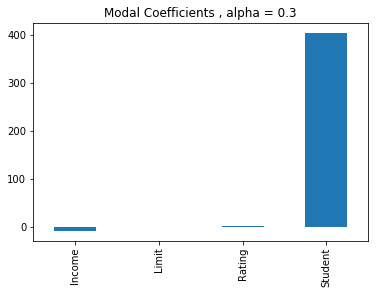

In [14]:
predictors = X2.columns
coef4 = Series(lassoReg.coef_,predictors).sort_values()
print(coef4)
coef4.plot(kind='bar', title='Modal Coefficients , alpha = 0.3')

Income       0.048132
Limit        0.057567
Rating       0.858545
Student    195.822788
dtype: float64


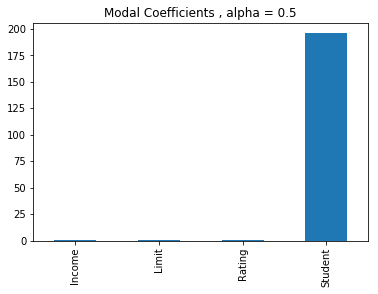

In [15]:
predictors = X2.columns
coef5 = Series(ridge_reg2.coef_,predictors).sort_values()
print(coef5)
coef5.plot(kind='bar', title='Modal Coefficients , alpha = 0.5')

Income      -0.369403
Limit        0.064656
Rating       0.964431
Student    225.250686
dtype: float64


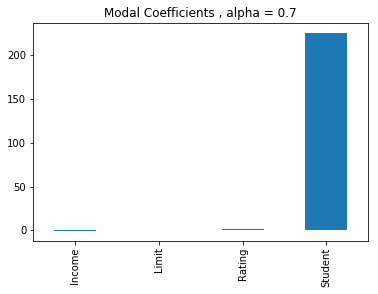

In [16]:
predictors = X2.columns
coef6 = Series(ridge_reg3.coef_,predictors).sort_values()
print(coef6)
coef6.plot(kind='bar', title='Modal Coefficients , alpha = 0.7')

Modal co-efficients depend on the Student feature again which confirms the ridge regression estimation.

   e. Use rating (one input variable) to predict the balance using regular regression, ridge regression, and lasso regression. Display both test error and training error as a function of regularization hyperparameter. In another figure, display the data set, and regression lines for both standard and regularized methods. Discuss your observations.

        Creating test and train data for Rating coulmn

In [17]:
Xe = credit.drop(['Income','Limit','Cards','Age','Education','Gender','Student','Married','Ethnicity','Balance'],axis = 1)
ye = credit.Balance
Xe = Xe.values
ye = ye.values
from sklearn.cross_validation import train_test_split
XE_train, XE_test, YE_train, YE_test = train_test_split(Xe, ye, test_size=0.2)
XE_train.shape

(320, 1)

        Ridge Regression for Rating Column

In [18]:
## alpha = 0.5

from sklearn.linear_model import Ridge
ridge_reg4 = Ridge(alpha= 0.5, solver="cholesky",normalize=True)
ridge_reg4.fit(XE_train, YE_train)
y_pred4 = ridge_reg4.predict(XE_test)
#A.append(y_pred)

mse4 = np.mean((y_pred4 - YE_test)**2)
print("Ridge Score 1 for rating", ridge_reg4.score(XE_test,YE_test))

print("Ridge MSE 1 for rating=" ,mse)
print("Predited output 1 =" , y_pred4)

print()

## alpha = 0.3

from sklearn.linear_model import Ridge
ridge_reg5 = Ridge(alpha= 0.3, solver="cholesky",normalize=True)
ridge_reg5.fit(XE_train, YE_train)
y_pred5 = ridge_reg5.predict(XE_test)
#A.append(y_pred)

mse5 = np.mean((y_pred5 - YE_test)**2)
print("Ridge Score 1 for rating", ridge_reg5.score(XE_test,YE_test))

print("Ridge MSE 2 for rating =" ,mse5)
print("Predited output 2 =" , y_pred5)

print()

## alpha = 0.001

from sklearn.linear_model import Ridge
ridge_reg6 = Ridge(alpha= 0.001, solver="cholesky",normalize=True)
ridge_reg6.fit(XE_train, YE_train)
y_pred6 = ridge_reg6.predict(XE_test)
#A.append(y_pred)

mse6 = np.mean((y_pred6 - YE_test)**2)
print("Ridge Score 1 for rating", ridge_reg6.score(XE_test,YE_test))

print("Ridge MSE 3 for rating =",mse6)
print("Predited output 1 =" ,y_pred6)


Ridge Score 1 for rating 0.708100704615
Ridge MSE 1 for rating= 36846.8534628
Predited output 1 = [  477.13599134   687.20776525   320.44311079  1214.10909981   563.23098064
   499.52068856   373.82200417   539.12438364   222.29482298   711.31436225
   409.98189967   213.68532405   616.60987401   434.08849668   432.36659689
   663.10116824   542.56818321   549.45578235   654.49166931   747.47425776
   380.70960331   456.4731939    802.57505092   508.13018749   428.92279732
   430.64469711   310.11171208   688.92966503   508.13018749   575.28427915
   492.63308941  1348.41728314   850.78824493   409.98189967   373.82200417
   723.36766076   203.35392533   225.73862256   692.37346461   744.03045819
   502.96448813   523.62728556   236.07002127  1090.13231521   664.82306803
   585.61567786   396.20670139   504.68638791   182.6911279    669.98876739
   599.39087615   125.86843496  1606.70225106   203.35392533   229.18242213
   556.3433815   1202.05580131   384.15340288   361.76870566   993

We can see that for low alpha the score is good but after sometime the score remains 
constant as rating is not the primary column for estimation of balance.

[[0.0], [0.1], [0.2], [0.30000000000000004], [0.4], [0.5], [0.6], [0.7], [0.7999999999999999], [0.8999999999999999], [0.9999999999999999], [1.0999999999999999], [1.2], [1.3], [1.4000000000000001], [1.5000000000000002], [1.6000000000000003], [1.7000000000000004], [1.8000000000000005], [1.9000000000000006]]


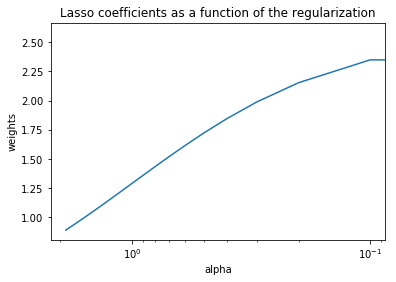

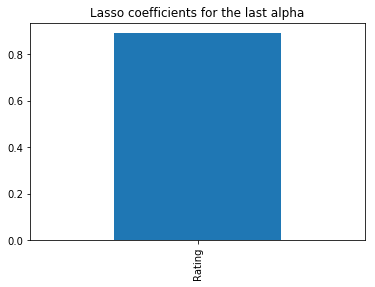

In [19]:
d = []
c = [[]]
i = 0.0

while i< 2.0:
    ridgelr_reg = Ridge(alpha= i, solver="cholesky",normalize=True)
    ridgelr_reg.fit(XE_train, YE_train)
    y_predlr = ridgelr_reg.predict(XE_test)
    c.append([i])
    i += 0.1
    from pandas import DataFrame, Series
    X3 = credit[['Rating']]
    coeff = DataFrame(X3.columns)
    coeff['Credit'] = Series(ridgelr_reg.coef_)
    predictors = X3.columns
    coef = Series(ridgelr_reg.coef_,predictors).sort_values()
    d.append(coef)

    #print(coeff)

c.pop(0)
ax = plt.gca()
print (c)

ax.plot(c, d)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Lasso coefficients as a function of the regularization')
plt.axis('tight')
plt.show()  

coef.plot(kind="bar", x="c", y="d")
plt.title('Lasso coefficients for the last alpha')
plt.show()

(9.9999999999999994e-12,
 100000000000.0,
 -29.601339867088434,
 444.81381821790961)

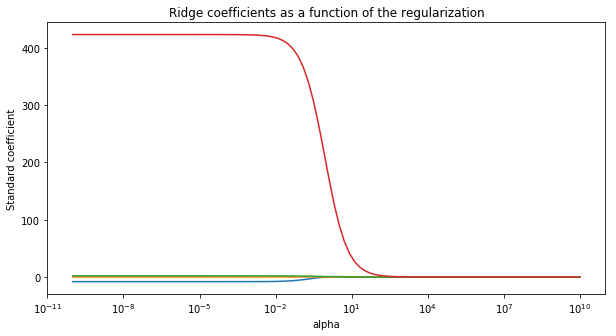

In [45]:
classif = ridgelr_reg
coeff = []
alphas = np.logspace(-10,10, 100)

for a in alphas:
    classif.set_params(alpha=a)
    classif.fit(X_train, Y_train)
    coeff.append(classif.coef_)

plt.figure(figsize=(10, 5))
input_a=np.vstack(coeff)
g = plt.gca()
g.plot(alphas, input_a)
g.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('Standard coefficient')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')


        0  Credit
0  Rating  1.7219


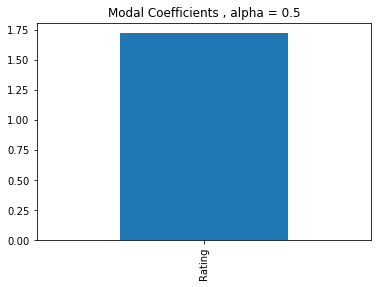

In [20]:
from pandas import DataFrame, Series
X3 = credit[['Rating']]
coeffE = DataFrame(X3.columns)
coeffE['Credit'] = Series(ridge_reg4.coef_)
print(coeffE)

predictors = X3.columns
coef7 = Series(ridge_reg4.coef_,predictors).sort_values()
coef7.plot(kind='bar', title='Modal Coefficients , alpha = 0.5')

        0    Credit
0  Rating  1.986807


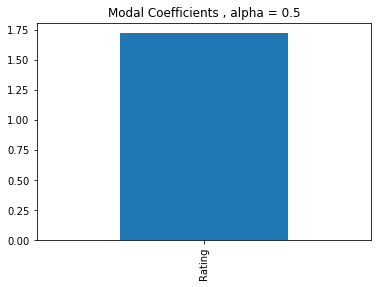

In [21]:
from pandas import DataFrame, Series
X3 = credit[['Rating']]
coeffE5 = DataFrame(X3.columns)
coeffE5['Credit'] = Series(ridge_reg5.coef_)
print(coeffE5)

predictors = X3.columns
coef8 = Series(ridge_reg4.coef_,predictors).sort_values()
coef8.plot(kind='bar', title='Modal Coefficients , alpha = 0.5')

        0    Credit
0  Rating  2.580269


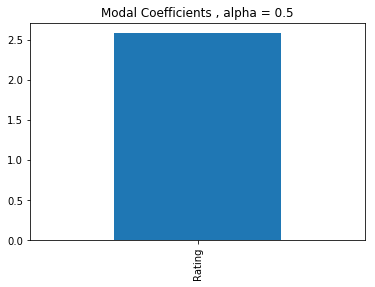

In [22]:
from pandas import DataFrame, Series
X3 = credit[['Rating']]
coeffE6 = DataFrame(X3.columns)
coeffE6['Credit'] = Series(ridge_reg6.coef_)
print(coeffE6)

predictors = X3.columns
coef9 = Series(ridge_reg6.coef_,predictors).sort_values()
coef9.plot(kind='bar', title='Modal Coefficients , alpha = 0.5')

        Here only rating feature is present so it shows only rating column

         Lasso Regression for rating feature

C:\Users\dhar_\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  import sys
C:\Users\dhar_\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\linear_model\coordinate_descent.py:477: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\Users\dhar_\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[[0.0], [0.1], [0.2], [0.30000000000000004], [0.4], [0.5], [0.6], [0.7], [0.7999999999999999], [0.8999999999999999], [0.9999999999999999], [1.0999999999999999], [1.2], [1.3], [1.4000000000000001], [1.5000000000000002], [1.6000000000000003], [1.7000000000000004], [1.8000000000000005], [1.9000000000000006]]


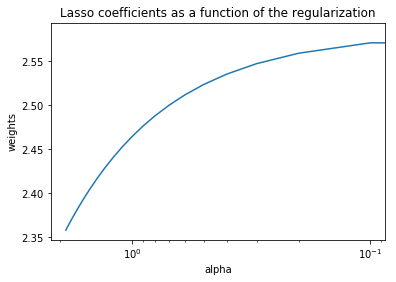

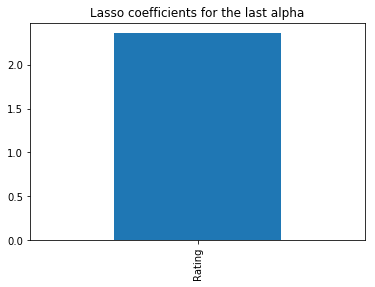

In [23]:
d = []
c = [[]]
i = 0.0

while i< 2.0:
    lassoReglr = Lasso(alpha=i, normalize=True)
    lassoReglr.fit(XE_train,YE_train)
    y_lasso_predlr = lassoReglr.predict(XE_test)
    c.append([i])
    i += 0.1
    from pandas import DataFrame, Series
    X3 = credit[['Rating']]
    coeff = DataFrame(X3.columns)
    coeff['Credit'] = Series(lassoReglr.coef_)
    predictors = X3.columns
    coef = Series(lassoReglr.coef_,predictors).sort_values()
    d.append(coef)

    #print(coeff)

c.pop(0)
ax = plt.gca()
print (c)

ax.plot(c, d)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Lasso coefficients as a function of the regularization')
plt.axis('tight')
plt.show()  

coef.plot(kind="bar", x="c", y="d")
plt.title('Lasso coefficients for the last alpha')
plt.show()

(9.9999999999999994e-12,
 100000000000.0,
 -0.12914248396184644,
 2.7119921631987749)

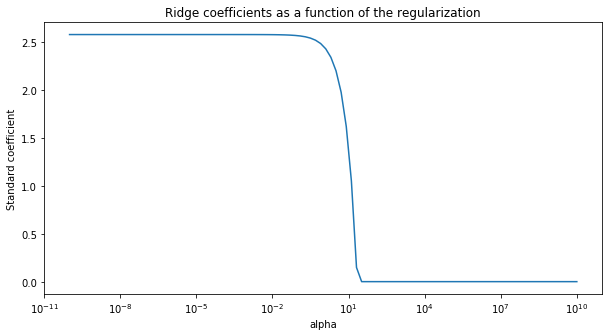

In [44]:
classif = lassoReglr
coeff = []
alphas = np.logspace(-10,10, 100)

for a in alphas:
    classif.set_params(alpha=a)
    classif.fit(XE_train, YE_train)
    coeff.append(classif.coef_)

plt.figure(figsize=(10, 5))
input_a=np.vstack(coeff)
g = plt.gca()
g.plot(alphas, input_a)
g.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('Standard coefficient')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')


In [24]:
###    Lasso Regression for rating column  to predict balance  ###

from sklearn.linear_model import Lasso

#alpha = 0.3
lassoReg4 = Lasso(alpha=0.3, normalize=True)
lassoReg4.fit(XE_train,YE_train)
y_lasso_pred4 = lassoReg4.predict(XE_test)

# calculating mse
lasso_mse4 = np.mean((y_lasso_pred4 - YE_test)**2)
print("Lasso MSE 1 =" ,lasso_mse4)
print("Lasso Score 1 =" ,lassoReg4.score(XE_test,YE_test))
print()


#alpha = 0.5
lassoReg5 = Lasso(alpha=0.5, normalize=True)
lassoReg5.fit(XE_train,YE_train)
y_lasso_pred5 = lassoReg5.predict(XE_test)

# calculating mse
lasso_mse5 = np.mean((y_lasso_pred5 - YE_test)**2)
print("Lasso MSE 2 =" ,lasso_mse5)
print("Lasso Score 2 =" ,lassoReg5.score(XE_test,YE_test))
print()

#alpha = 0.7
lassoReg6 = Lasso(alpha=0.7, normalize=True)
lassoReg6.fit(XE_train,YE_train)
y_lasso_pred6 = lassoReg6.predict(XE_test)

# calculating mse
lasso_mse6 = np.mean((y_lasso_pred6 - YE_test)**2)
print("Lasso MSE 3 =" ,lasso_mse6)
print("Lasso Score 3 =" ,lassoReg6.score(XE_test,YE_test))
print()

Lasso MSE 1 = 48020.3591474
Lasso Score 1 = 0.785946577763

Lasso MSE 2 = 47988.0468803
Lasso Score 2 = 0.786090611492

Lasso MSE 3 = 47987.2367972
Lasso Score 3 = 0.786094222482



        0    Credit
0  Rating -6.282752


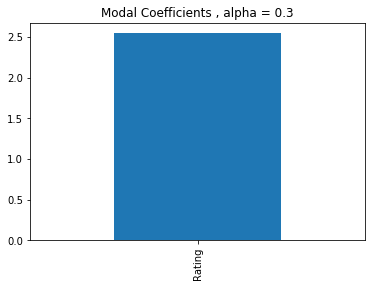

In [25]:
from pandas import DataFrame, Series
X3 = credit[['Rating']]
coeffE = DataFrame(X3.columns)
coeffE['Credit'] = Series(lassoReg3.coef_)
print(coeffE)

predictors = X3.columns
coef10 = Series(lassoReg4.coef_,predictors).sort_values()
coef10.plot(kind='bar', title='Modal Coefficients , alpha = 0.3')

        0    Credit
0  Rating  2.523651


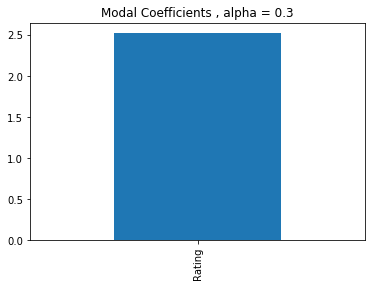

In [26]:
from pandas import DataFrame, Series
X3 = credit[['Rating']]
coeffE = DataFrame(X3.columns)
coeffE['Credit'] = Series(lassoReg5.coef_)
print(coeffE)

predictors = X3.columns
coef11 = Series(lassoReg5.coef_,predictors).sort_values()
coef11.plot(kind='bar', title='Modal Coefficients , alpha = 0.3')

        0    Credit
0  Rating  2.499971


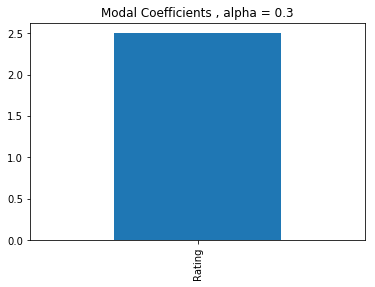

In [27]:
from pandas import DataFrame, Series
X3 = credit[['Rating']]
coeffE = DataFrame(X3.columns)
coeffE['Credit'] = Series(lassoReg6.coef_)
print(coeffE)

predictors = X3.columns
coef12 = Series(lassoReg6.coef_,predictors).sort_values()
coef12.plot(kind='bar', title='Modal Coefficients , alpha = 0.3')

        Defining function for plotting training vs test error

In [28]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

def plot_learning_curves(model, X, y,sub):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))
    plt.subplot(sub)
    plt.rcParams["figure.figsize"] =(20,10)
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")


        Ridge Regression Training vs test error

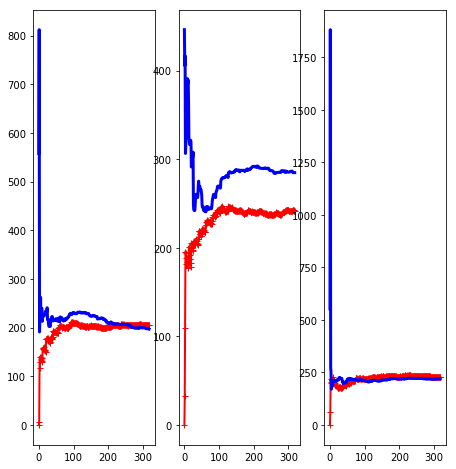

In [49]:
plot_learning_curves(ridge_reg, X, y,141)
plot_learning_curves(ridge_reg2, X, y,142)
plot_learning_curves(ridge_reg3, X, y,143)

The difference between the training and test error decreases as the 
number of training sample increases so the estimator predicts correct output.

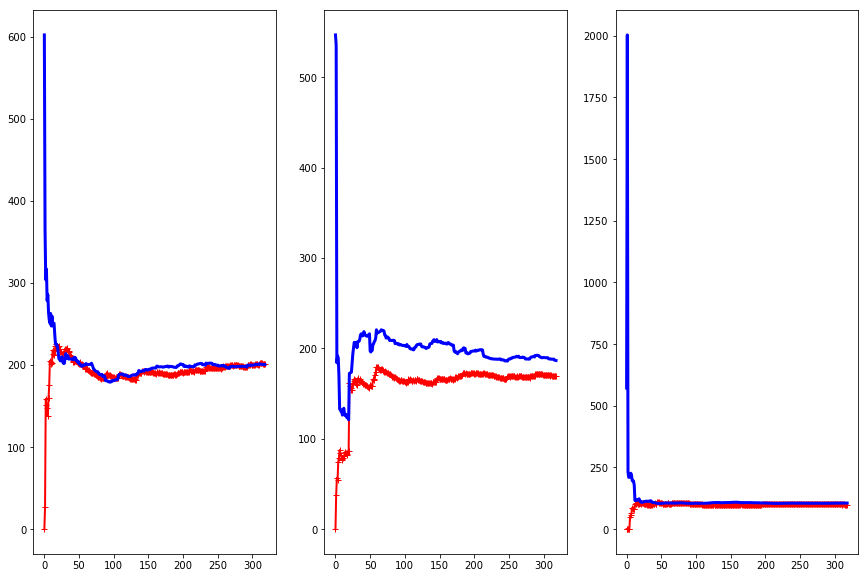

In [30]:
plot_learning_curves(ridge_reg4, X, y,141)
plot_learning_curves(ridge_reg5, X, y,142)
plot_learning_curves(ridge_reg6, X, y,143)

        Lasso regression Training vs test error

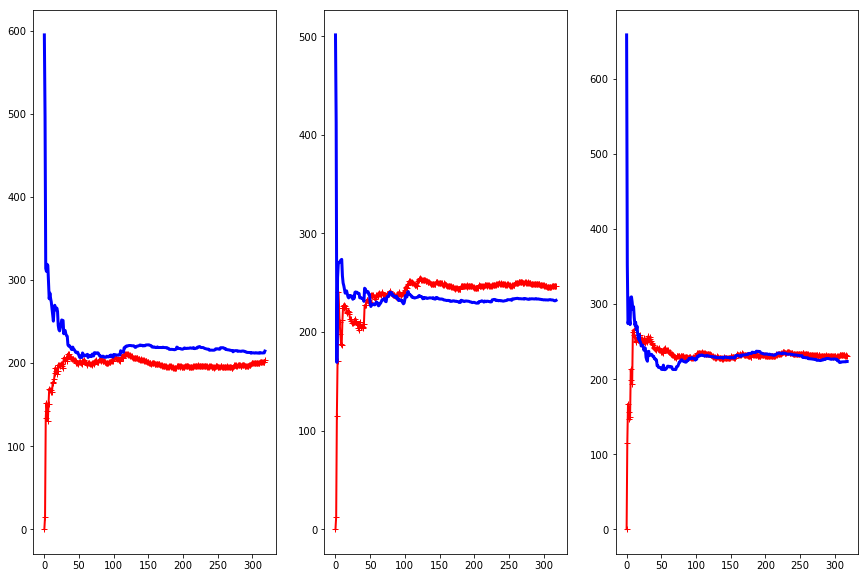

In [31]:
plot_learning_curves(ridge_reg, X, y,141)
plot_learning_curves(ridge_reg2, X, y,142)
plot_learning_curves(ridge_reg3, X, y,143)

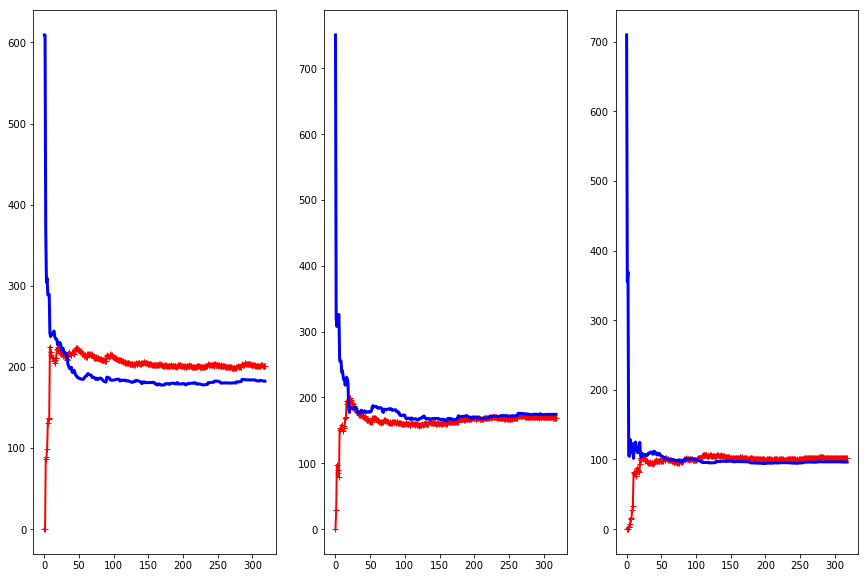

In [32]:
plot_learning_curves(ridge_reg4, X, y,141)
plot_learning_curves(ridge_reg5, X, y,142)
plot_learning_curves(ridge_reg6, X, y,143)

        Linear Regression

In [33]:
XE_test.shape

(80, 1)

In [34]:
from sklearn.linear_model import LinearRegression

linereg = LinearRegression()

linereg.fit(XE_train,YE_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [35]:
y_linreg_pred = linereg.predict(XE_test)
print(y_linreg_pred)

[  452.8867995    767.99446037   217.84747869  1558.34646222   582.02928347
   486.46384533   297.91581875   545.86938796    70.62504697   804.15435588
   352.15566201    57.71079858   662.09762352   388.31555752   385.73270784
   731.83456486   551.03508731   561.36648603   718.92031647   858.39419914
   308.24721746   421.89260335   941.04538888   499.37809373   380.56700848
   383.14985816   202.35038062   770.57731005   499.37809373   600.10923122
   476.13244662  1759.8087372   1013.3651799    352.15566201   297.91581875
   822.23430364    42.2137005     75.79074633   775.74300941   853.22849979
   491.62954469   522.62374084    91.28784441  1372.38128532   734.41741454
   615.6063293    331.49286458   494.21239437    11.21950435   742.16596358
   636.26912673   -74.01453506  2147.23618909    42.2137005     80.95644569
   571.69788475  1540.26651447   313.41291682   279.83587099  1227.74170328
   365.06991041   571.69788475   -32.6889402    101.61924313   166.19048511
    -9.44329

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline
def plotskar(X_Tr,Y_Tr,X_te,Y_te,predi,sub):
    plt.subplot(sub)
    plt.rcParams["figure.figsize"] =(10,8)
    plt.plot(X_te, predi, "b-")
    plt.plot(X_te, Y_te, "r.")
    plt.plot(X_Tr, Y_Tr, "g.")
    plt.show()

        Ridge Regression lines and dataset for income, limit, rating, student

Ridge Regression 1 Alpha = 0.5


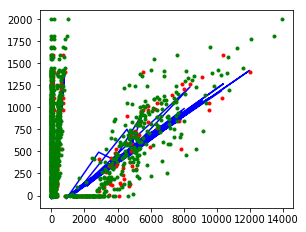

Ridge Regression 2 Alpha = 1


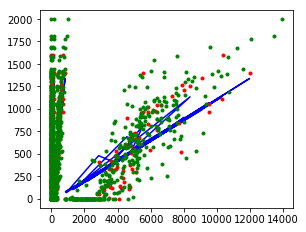

Ridge Regression 3 Alpha = 0.7


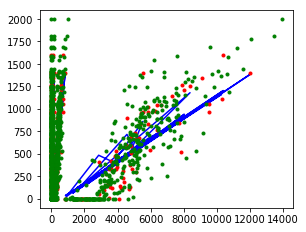

In [48]:
print("Ridge Regression 1 Alpha = 0.5")
plotskar(X_train,Y_train,X_test,Y_test,y_pred,221)
print("Ridge Regression 2 Alpha = 1")
plotskar(X_train,Y_train,X_test,Y_test,y_pred2,222)
print("Ridge Regression 3 Alpha = 0.7")
plotskar(X_train,Y_train,X_test,Y_test,y_pred3,221)

        Lasso Regression for income, limit, rating, student

Lasso Regression 1 Alpha = 0.3


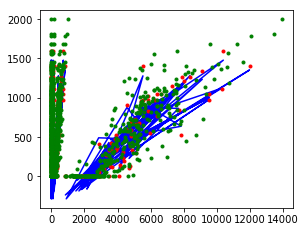

Lasso Regression 2 Alpha = 0.5


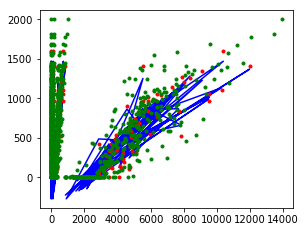

Lasso Regression 3 Alpha = 0.7


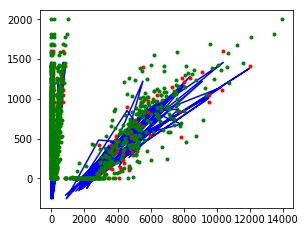

In [38]:
print("Lasso Regression 1 Alpha = 0.3")
plotskar(X_train,Y_train,X_test,Y_test,y_lasso_pred,221)
print("Lasso Regression 2 Alpha = 0.5")
plotskar(X_train,Y_train,X_test,Y_test,y_lasso_pred2,222)
print("Lasso Regression 3 Alpha = 0.7")
plotskar(X_train,Y_train,X_test,Y_test,y_lasso_pred3,221)

        Ridge regression for Rating

Ridge Regression 1 Alpha = 0.5


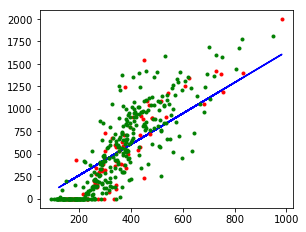

Ridge Regression 2 Alpha = 0.3


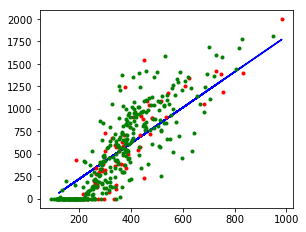

Ridge Regression 3 Alpha = 0.01


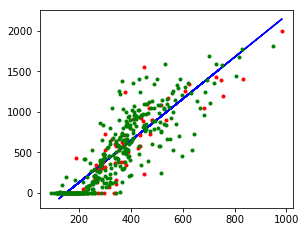

In [39]:
print("Ridge Regression 1 Alpha = 0.5")
plotskar(XE_train,YE_train,XE_test,YE_test,y_pred4,221)
print("Ridge Regression 2 Alpha = 0.3")
plotskar(XE_train,YE_train,XE_test,YE_test,y_pred5,222)
print("Ridge Regression 3 Alpha = 0.01")
plotskar(XE_train,YE_train,XE_test,YE_test,y_pred6,221)

Lasso Regression 1 Alpha = 0.5


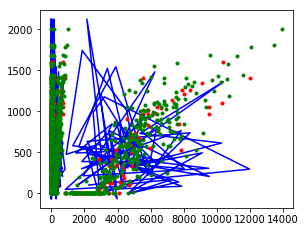

Lasso Regression 2 Alpha = 0.3


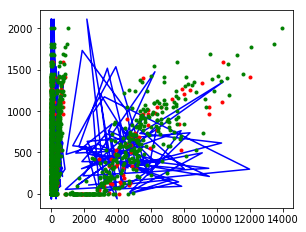

Lasso Regression 3 Alpha = 0.01


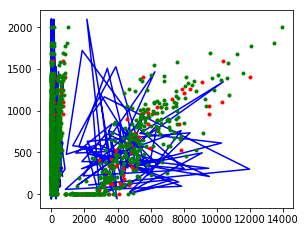

In [40]:
print("Lasso Regression 1 Alpha = 0.5")
plotskar(X_train,Y_train,X_test,Y_test,y_lasso_pred4,221)
print("Lasso Regression 2 Alpha = 0.3")
plotskar(X_train,Y_train,X_test,Y_test,y_lasso_pred5,222)
print("Lasso Regression 3 Alpha = 0.01")
plotskar(X_train,Y_train,X_test,Y_test,y_lasso_pred6,221)

         Linear Regression for rating

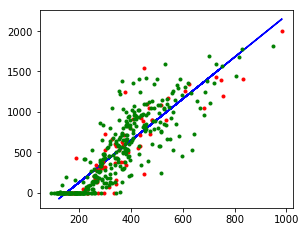

In [41]:
plotskar(XE_train,YE_train,XE_test,YE_test,y_linreg_pred,221)

When we use all the features then student is the main feature which is used to estimate the balance. 
But when one feature Rating is used then the balance estimation for the ridge regression has a straight
regression line. 
Parameter alpha/lambda has a effect on the regression. 